In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

In [112]:
movies=pd.read_csv("../../Data_sets/movies_2.csv")

In [3]:
movies.isna().sum()

MovieID           0
Title             1
MPAA Rating       1
Budget            1
Gross             1
Release Date      1
Genre             1
Runtime           1
Rating          108
Rating Count    108
Summary         120
dtype: int64

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MovieID       616 non-null    int64  
 1   Title         615 non-null    object 
 2   MPAA Rating   615 non-null    object 
 3   Budget        615 non-null    float64
 4   Gross         615 non-null    float64
 5   Release Date  615 non-null    object 
 6   Genre         615 non-null    object 
 7   Runtime       615 non-null    float64
 8   Rating        508 non-null    float64
 9   Rating Count  508 non-null    float64
 10  Summary       496 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 53.1+ KB


In [114]:
movies.drop(labels="Summary",axis=1,inplace=True)

In [116]:
movies.drop(labels=[615],axis=0,inplace=True)

In [107]:
#movies.dropna(axis=0,subset=["budget"],inplace=True)

In [117]:
movies.isna().sum()

MovieID           0
Title             0
MPAA Rating       0
Budget            0
Gross             0
Release Date      0
Genre             0
Runtime           0
Rating          107
Rating Count    107
dtype: int64

In [109]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   movieid       615 non-null    int64         
 1   title         615 non-null    object        
 2   mpaa_rating   615 non-null    object        
 3   budget        615 non-null    float64       
 4   gross         615 non-null    float64       
 5   release_date  615 non-null    datetime64[ns]
 6   genre         615 non-null    object        
 7   runtime       615 non-null    float64       
 8   rating        615 non-null    float64       
 9   rating_count  615 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 48.2+ KB


In [111]:


movies["rating"] = movies["rating"].astype(float)


In [13]:
movies.dtypes

MovieID           int64
Title            object
MPAA Rating      object
Budget          float64
Gross           float64
Release Date     object
Genre            object
Runtime         float64
Rating          float64
Rating Count    float64
dtype: object

In [120]:

movies.rename(str.lower,axis="columns",inplace=True)

In [121]:
movies.rename(columns={"mpaa rating":"mpaa_rating","release date":"release_date","rating count":"rating_count"},inplace=True)

In [16]:
movies.isnull().sum()

movieid           0
title             0
mpaa_rating       0
budget            0
gross             0
release_date      0
genre             0
runtime           0
rating          107
rating_count    107
dtype: int64

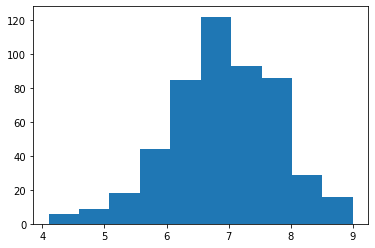

In [17]:
#Distribution RATING (negatevly skewed )

plt.hist(movies["rating"])
plt.show()

In [122]:
print("median", stats.median(movies["rating"]))
print("mean",np.mean(movies["rating"]))
print("mode", stats.mode(movies["rating"]))
print("st_deviation",np.std(movies["rating"]))
#print("skewness",movies["rating"].skew(movies["rating"]))



median 7.2
mean 6.917322834645666
mode 6.9
st_deviation 0.8880523223740002


In [19]:
movies["rating"].fillna(value=movies["rating"].median(),inplace=True)

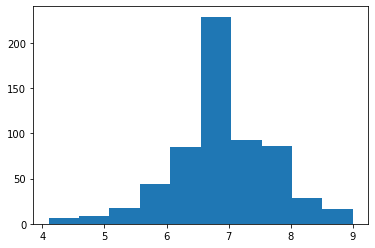

median 6.9
mean 6.914308943089427
mode 6.9
st_deviation 0.8071369468037188


In [20]:
#Distribution RATING (Normal)
# after replacing missing values

plt.hist(movies["rating"])
plt.show()
print("median", stats.median(movies["rating"]))
print("mean",np.mean(movies["rating"]))
print("mode", stats.mode(movies["rating"]))
print("st_deviation",np.std(movies["rating"]))

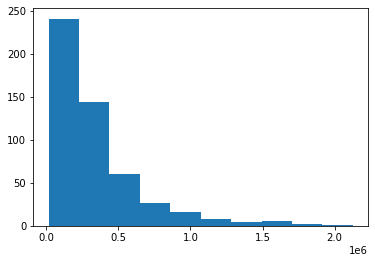

median 317843.0
mean 339252.1200787402
mode 91415.0
st_deviation 321022.4018045004
skew 2.242388135617718


In [125]:
#Distribution RATING_ COUNT (positvely skewed )
plt.hist(movies["rating_count"])
plt.show()
print("median", stats.median(movies["rating_count"]))
print("mean", np.mean(movies["rating_count"]))
print("mode", stats.mode(movies["rating_count"]))
print("st_deviation",np.std(movies["rating_count"]))
print("skew",movies["rating_count"].skew())

In [21]:
movies["rating_count"].fillna(value=movies["rating_count"].median(),inplace=True)

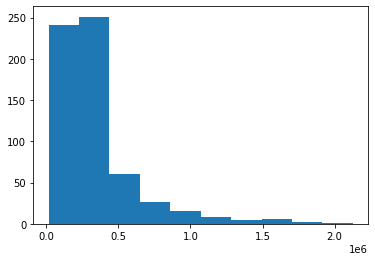

median 240347.5
mean 322044.3243902439
mode 240347.5
st_deviation 294161.93477745407


In [22]:
#Distribution RATING_count (Normal)
# after replacing missing values

plt.hist(movies["rating_count"])
plt.show()
print("median", stats.median(movies["rating_count"]))
print("mean", np.mean(movies["rating_count"]))
print("mode", stats.mode(movies["rating_count"]))
print("st_deviation",np.std(movies["rating_count"]))

In [33]:
from datetime import datetime
movies["release_date"]=pd.to_datetime(movies["release_date"])

In [34]:
movies[(movies["rating"]>7)&(movies["gross"]>50000000)]

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,2,Driving Miss Daisy,PG,7500000.0,145793296.0,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,71079915.0,1989-07-28,Crime,100.0,7.2,91415.0
3,4,Born on the Fourth of July,R,14000000.0,161001698.0,1989-12-20,War,145.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,84431625.0,1989-04-21,Drama,107.0,7.5,101702.0
6,7,When Harry Met Sally...,R,16000000.0,92800000.0,1989-07-21,Romance,96.0,7.6,180871.0
...,...,...,...,...,...,...,...,...,...,...
505,506,Big Hero 6,PG,165000000.0,652105443.0,2014-10-24,Animation,102.0,7.8,380953.0
506,507,Interstellar,PG-13,165000000.0,675120017.0,2014-11-05,Science Fiction,169.0,8.6,1343549.0
507,508,Captain America: The Winter Soldier,PG-13,170000000.0,714766572.0,2014-03-20,Action,136.0,7.7,685903.0
508,509,Dawn of the Planet of the Apes,PG-13,170000000.0,710644566.0,2014-06-26,Science Fiction,130.0,7.6,395425.0


In [35]:
#show the movies with more than 7 in Rating & greater than 50 million Gross & with Parental guidance as MPAA Rating
movies[(movies["rating"]>7)&(movies["gross"]>50000000)&(movies["mpaa_rating"]=="PG")]

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
1,2,Driving Miss Daisy,PG,7500000.0,1.457933e+08,1989-12-13,Comedy,99.0,7.4,91075.0
2,3,Turner & Hooch,PG,13000000.0,7.107992e+07,1989-07-28,Crime,100.0,7.2,91415.0
4,5,Field of Dreams,PG,15000000.0,8.443162e+07,1989-04-21,Drama,107.0,7.5,101702.0
7,8,Dead Poets Society,PG,16400000.0,2.358601e+08,1989-06-02,Drama,129.0,8.1,382002.0
13,14,Batman,PG,35000000.0,4.113489e+08,1989-06-23,Action,126.0,7.5,319517.0
15,16,The Little Mermaid,PG,40000000.0,2.223000e+08,1989-11-17,Animation,83.0,7.6,219221.0
16,17,Back to the Future Part II,PG,40000000.0,3.320000e+08,1989-11-20,Science Fiction,108.0,7.8,438940.0
19,20,Steel Magnolias,PG,15000000.0,9.590409e+07,1989-11-15,Drama,119.0,7.3,43037.0
24,25,Home Alone,PG,18000000.0,4.766847e+08,1990-11-09,Family,103.0,7.6,414472.0
32,33,The Hunt for Red October,PG,30000000.0,1.992000e+08,1990-03-02,Thriller,134.0,7.6,167212.0


In [127]:
#count of Animation movies with more than 7 in Rating (use the shape() function)
movies[(movies["genre"]=="Animation")&(movies["rating"]>=7)].shape

(39, 10)

In [37]:
#show the list of top 5 movies based on Budget
sorted_by_budget=movies.sort_values(by=["budget"],ascending=False)
sorted_by_budget.head(5)

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
594,595,Avengers: Infinity War,PG-13,400000000.0,2.048000e+09,2018-04-23,Action,149.0,6.9,240347.5
454,455,Pirates of the Caribbean: On Stranger Tides,PG-13,380000000.0,1.045714e+09,2011-05-14,Action,136.0,6.6,455211.0
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,6.9,240347.5
574,575,Star Wars: The Last Jedi,PG-13,317000000.0,1.333000e+09,2019-12-09,Science Fiction,152.0,6.9,240347.5
375,376,Pirates of the Caribbean: At World's End,PG-13,300000000.0,9.610000e+08,2007-05-19,Adventure,169.0,7.1,565402.0


In [43]:
#show the top 5 Comedy movies by Rating
sorted_by_rating=movies.sort_values(by=["rating"],ascending=False)
sorted_by_rating[sorted_by_rating["genre"]=="Comedy"].head(5)


,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
111,112,Forrest Gump,PG-13,55000000.0,677945399.0,1994-07-06,Comedy,142.0,8.8,1657851.0
185,186,The Truman Show,PG,60000000.0,264118201.0,1998-06-04,Comedy,103.0,8.1,859224.0
80,81,Groundhog Day,PG,14600000.0,70906973.0,1993-02-11,Comedy,101.0,8.0,549538.0
254,255,"Monsters, Inc.",G,115000000.0,562816256.0,2001-11-01,Comedy,92.0,8.0,758349.0
164,165,As Good as It Gets,PG-13,50000000.0,314178011.0,1997-12-19,Comedy,139.0,7.7,258974.0


In [45]:
#top 5 movie names by Rating
sorted_by_rating["title"].head(5)



393                                  The Dark Knight
83                                  Schindler's List
287    The Lord of the Rings: The Return of the King
99                                      Pulp Fiction
98                                 Jurassic Park III
Name: title, dtype: object

In [58]:
#top 3 high Gross Romance movies released after 1999, not included (typecast it to datetime)
sorted_by_rating[(sorted_by_rating["genre"]=="Romance")&(sorted_by_rating["release_date"]>="2000-01-01")].head(5)

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
217,218,"Crouching Tiger, Hidden Dragon",PG-13,17000000.0,213525736.0,2000-10-01,Romance,120.0,7.8,242878.0
577,578,A Star is Born,R,36000000.0,435000000.0,2018-08-31,Romance,135.0,6.9,240347.5
576,577,Crazy Rich Asians,PG-13,30000000.0,238500000.0,2018-08-07,Romance,121.0,6.9,240347.5
400,401,The Proposal,PG-13,40000000.0,317375031.0,2009-06-01,Romance,108.0,6.7,277605.0
379,380,Mamma Mia!,PG-13,52000000.0,609841637.0,2008-07-03,Romance,108.0,6.4,198801.0


In [98]:
#how many Genres are present in the dataframe? !!!!!
pd.value_counts(movies["genre"]).size

16

In [97]:
genre=pd.Series(movies["genre"])
genre.value_counts().size

16

In [ ]:
#unique

In [59]:
#top 5 expensive movies released after 1999, not included (measured by Budget)
sorted_by_budget[sorted_by_budget["release_date"]>="2000-01-01"].head(5)

,movieid,title,mpaa_rating,budget,gross,release_date,genre,runtime,rating,rating_count
594,595,Avengers: Infinity War,PG-13,400000000.0,2.048000e+09,2018-04-23,Action,149.0,6.9,240347.5
454,455,Pirates of the Caribbean: On Stranger Tides,PG-13,380000000.0,1.045714e+09,2011-05-14,Action,136.0,6.6,455211.0
614,615,Avengers: Endgame,PG-13,356000000.0,2.796000e+09,2019-04-22,Action,181.0,6.9,240347.5
574,575,Star Wars: The Last Jedi,PG-13,317000000.0,1.333000e+09,2019-12-09,Science Fiction,152.0,6.9,240347.5
375,376,Pirates of the Caribbean: At World's End,PG-13,300000000.0,9.610000e+08,2007-05-19,Adventure,169.0,7.1,565402.0


In [60]:
#most  frequent MPAA Rating in the dataset in terms of occurances
movies["mpaa_rating"].mode()

0    PG-13
Name: mpaa_rating, dtype: object

In [61]:
movies["mpaa_rating"].value_counts()

PG-13    285
PG       161
R        142
G         27
Name: mpaa_rating, dtype: int64

In [62]:
# least frequent MPAA Rating in the dataset in terms of occurances
movies["mpaa_rating"].value_counts().idxmin()

'G'

In [103]:
#The mostt expensive Genre
genre_groups=movies.groupby(by=["genre"]).mean()
#genre_groups
genre_groups["budget"]=genre_groups["budget"].astype(int)
genre_groups.sort_values(by=["budget"],ascending=False).head(1)

,movieid,budget,gross,runtime,rating,rating_count
genre,,,,,,
Fantasy,376.740741,161211111,7.926055e+08,143.037037,7.337037,535283.12963


In [102]:
#The least expensive Genre
genre_groups=movies.groupby(by=["genre"]).mean()
#genre_groups
genre_groups["budget"]=genre_groups["budget"].astype(int)
genre_groups.sort_values(by=["budget"],ascending=False).tail(1)


,movieid,budget,gross,runtime,rating,rating_count
genre,,,,,,
Horror,338.857143,37004285,2.724708e+08,116.0,6.735714,219228.821429


In [96]:
#Genre is favored the most by the people?
#sorted_by_budget=movies.sort_values(by=["budget"],ascending=False)
genre_groups=movies.groupby(by=["genre"]).mean("rating")
genre_groups.sort_values(by=["rating"],ascending=False).head(1)

,movieid,budget,gross,runtime,rating,rating_count
genre,,,,,,
History,239.25,55500000.0,2.753178e+08,157.75,7.625,448652.0


In [93]:
#Genre is  less favored the most by the people?
#sorted_by_budget=movies.sort_values(by=["budget"],ascending=False)
genre_groups=movies.groupby(by=["genre"]).mean("rating")
genre_groups.sort_values(by=["rating"],ascending=False).tail(1)

,movieid,budget,gross,runtime,rating,rating_count
genre,,,,,,
Family,200.758621,6.268966e+07,2.920609e+08,104.172414,6.117241,156531.775862
